In [6]:
import HelperFunctions as helper
cities = helper.import_cities('cities.txt')
connections = helper.import_connections('connections.txt')

citiesByIndex = list(cities.values())
print(len(cities))

11


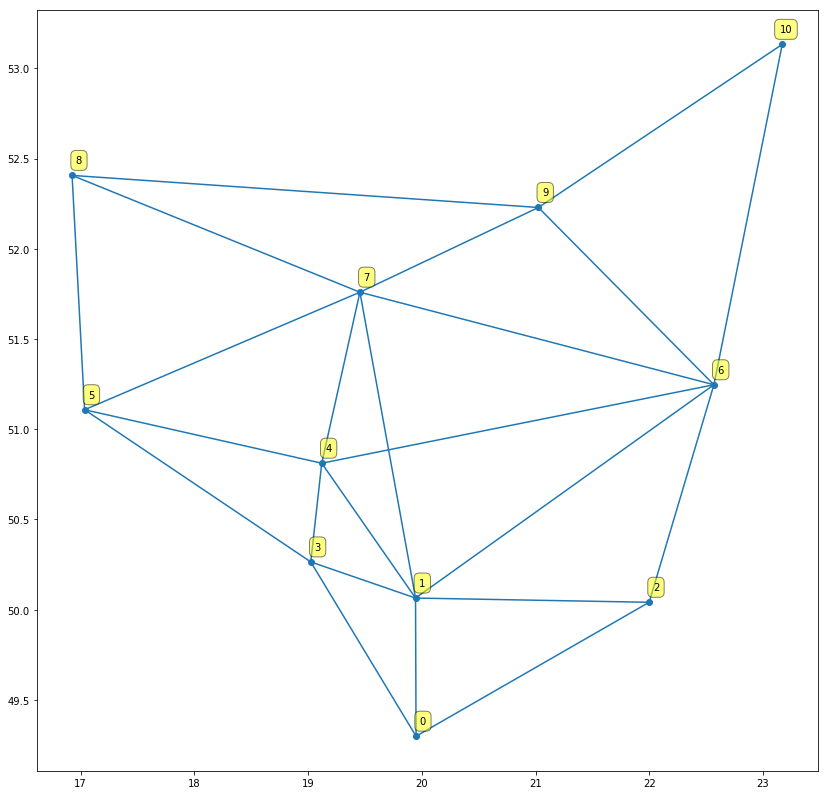

In [10]:
import matplotlib.pyplot as plt

DATA = ((1, 3),
        (2, 4),
        (3, 1),
        (4, 2))
# dash_style =
#     direction, length, (text)rotation, dashrotation, push
# (The parameters are varied to show their effects,
# not for visual appeal).
dash_style = (
    (0, 20, -15, 30, 10),
    (1, 30, 0, 15, 10),
    (0, 40, 15, 15, 10),
    (1, 20, 30, 60, 10),
    )

fig, ax = plt.subplots(figsize=(14, 14))

(y, x) = zip(*cities.values())
ax.plot(x, y, 'o')

for index, point in enumerate(cities.values()):
    plt.annotate(
        index, 
        xy=(point[1], point[0]), 
        xytext=(10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
    )
i = 0
# for name, coords in cities.items():
#     (x, y) = cities[name]
#     (dd, dl, r, dr, dp) = dash_style[i]
    #print('dashlen call %d' % dl)
#     t = ax.text(x, y, str((x, y)), withdash=True,
#                 dashdirection=dd,
#                 dashlength=dl,
#                 rotation=r,
#                 dashrotation=dr,
#                 dashpush=dp,
#                 )
#     i += 1
#     i %= 4


import matplotlib.lines as lines
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms

class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        # we'll update the position when the line data is set
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)

        # we can't access the label attr until *after* the line is
        # inited
        self.text.set_text(self.get_label())

    def set_figure(self, figure):
        self.text.set_figure(figure)
        lines.Line2D.set_figure(self, figure)

    def set_axes(self, axes):
        self.text.set_axes(axes)
        lines.Line2D.set_axes(self, axes)

    def set_transform(self, transform):
        # 2 pixel offset
        texttrans = transform + mtransforms.Affine2D().translate(2, 2)
        self.text.set_transform(texttrans)
        lines.Line2D.set_transform(self, transform)

    def set_data(self, x, y):
        if len(x):
            self.text.set_position((x[-1], y[-1]))

        lines.Line2D.set_data(self, x, y)

    def draw(self, renderer):
        # draw my label at the end of the line with 2 pixel offset
        lines.Line2D.draw(self, renderer)
        self.text.draw(renderer)


# Rysowanie linii.
for conn, distance in connections.items():
    A, B = conn.split(',')
    A = int(A)
    B = int(B)
    y, x = zip(citiesByIndex[A], citiesByIndex[B])
    # print(x, y)
    line = MyLine(x, y, mfc='red', ms=12)
    line.text.set_color('red')
    line.text.set_fontsize(16)
    ax.add_line(line)

plt.show()

In [15]:
graph = [[0 for x in range(len(connections))] for y in range(len(cities))]


# See incidence matrix: http://eduinf.waw.pl/inf/alg/001_search/0124.php 

for (i, key) in enumerate(connections.keys()):
    ab = key.split(',')
    a = int(ab[0])
    b = int(ab[1])
    
    # Oznaczenia w grafie skierowanym.
    try:
        graph[a][i] = 1
        graph[b][i] = -1
    except IndexError:
        print(i)
        print(a)
        print(b)
    
    # Oznaczenia w grafie nieskierowanym.
    # graph[int(a)][int(b)] = 1
    # graph[int(b)][int(a)] = 1
    
# Wyświetlenie grafu incydencji.
print('\n'.join([' '.join(['{:3}'.format(item) for item in row]) for row in graph]))

  1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 -1   0   0   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0  -1   0   0  -1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0  -1   0  -1   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0  -1   0   0   0   0  -1   0   1   1   1   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0  -1  -1   0   0   1   1   0   0   0   0   0   0   0
  0   0   0   0   0   0  -1   0  -1   0   0   0   0  -1   0   0   1   1   1   0   0   0   0
  0   0   0   0   0   0   0  -1   0   0   0   0  -1   0  -1   0  -1   0   0   1   1   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0  -1   0  -1   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0  -1   1   1
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0 

In [7]:
from Graph import Graph

graph = Graph(connections, cities)
graph.show_matrix()

  1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 -1   0   0   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0  -1   0   0  -1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0  -1   0  -1   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0  -1   0   0   0   0  -1   0   1   1   1   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0  -1  -1   0   0   1   1   0   0   0   0   0   0   0
  0   0   0   0   0   0  -1   0  -1   0   0   0   0  -1   0   0   1   1   1   0   0   0   0
  0   0   0   0   0   0   0  -1   0   0   0   0  -1   0  -1   0  -1   0   0   1   1   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0  -1   0  -1   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0  -1   1   1
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0 

In [37]:
start_node = 0
finish_node = 10
visited = []
edges_queue = []
queue = [start_node]


while queue:
    node = queue.pop(0)
    visited.append(node)
    
    if node == finish_node:
        print("Path: " + str(visited))
    
    for index, val in enumerate(graph.graph[node]):
        if val == 1:
            edges_queue.append(index)
            
    
    
    for n_index, node in enumerate(graph.graph):
        for e_index, edge in enumerate(node):
            if e_index in edges_queue:
                if abs(edge) == 1 and n_index not in visited and n_index not in queue:
                    queue.append(n_index)
            else:
                break
    print("Visited: " + str(visited))
    print("Queue: " + str(queue))

Visited: [0]
Queue: [1, 2, 3]
Visited: [0, 1]
Queue: [2, 3, 4, 6, 7]
Visited: [0, 1, 2]
Queue: [3, 4, 6, 7]
Visited: [0, 1, 2, 3]
Queue: [4, 6, 7, 5]
Visited: [0, 1, 2, 3, 4]
Queue: [6, 7, 5]
Visited: [0, 1, 2, 3, 4, 6]
Queue: [7, 5]
Visited: [0, 1, 2, 3, 4, 6, 7]
Queue: [5]
Visited: [0, 1, 2, 3, 4, 6, 7, 5]
Queue: [8, 9, 10]
Visited: [0, 1, 2, 3, 4, 6, 7, 5, 8]
Queue: [9, 10]
Visited: [0, 1, 2, 3, 4, 6, 7, 5, 8, 9]
Queue: [10]
Path: [0, 1, 2, 3, 4, 6, 7, 5, 8, 9, 10]
Visited: [0, 1, 2, 3, 4, 6, 7, 5, 8, 9, 10]
Queue: []
